# What is Deep learning? 

Let us take a look at the difference between "artificial intelligence", "Machine Learning" and "Deep Learning."

All three terms have historically been used interchangeably. Below is a picture showing these terms as concentric circles. AI encompasses ML, ML encompasses Deep Learning. If you would like to dive deeper into the history of AI check out this [link](http://sitn.hms.harvard.edu/flash/2017/history-artificial-intelligence/)

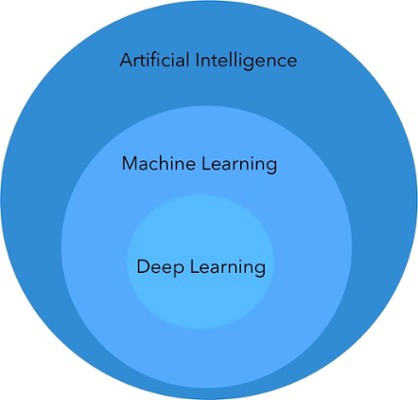


* __Artificial intelligence__ is the process developing computer systems that perform tasks which are usually reserved for human cognition. 

* __Machine learning__  revolvesaround creating systems that can learn useful patterns from large data sets, and hopefully provide useful insights. 

* __Deep learning__ is a technique within machine learning which uses vast amounts of data and neural networks with multiple layers to understand patterns within a dataset. 


# What, neural network? ?

A neural network is a collection of "neurons" with "synapses" connecting them. The collection is organized into three main sections: an input layer, (a) hidden layer and an output layer(s). Below is an image with two hidden layers.
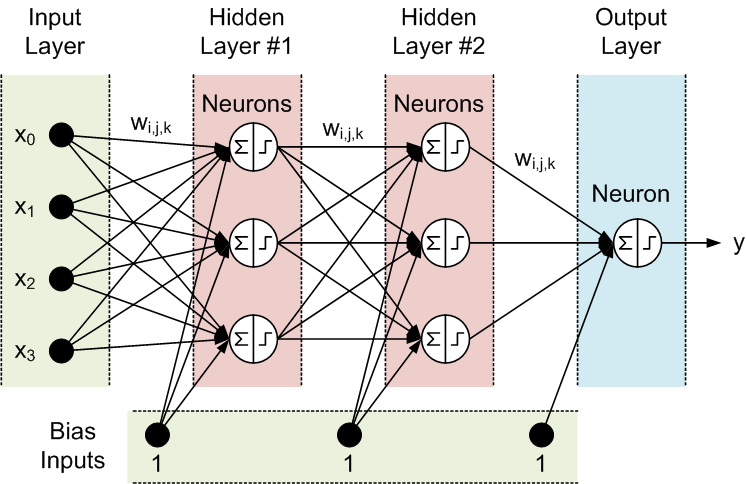

Circles here are neurons, the lines connecting them are synapses. For those of you interested, this picture shows the similarities between our neural networks and the ones in your brain.



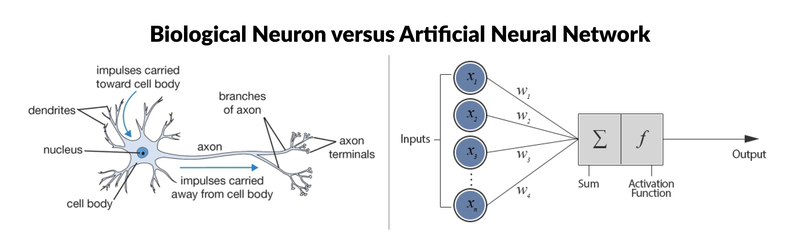

The circles are inputs the neurons are weight functions. Dendrites (or lines) take the input and multiply it by weights or the strength of the input in determining the output. Neurons add all the outputs and apply an activation function.

Training a neural network is __calibrating all the weights by repeating two steps, forward and back propagation__ Before we get into these, lets take apart the neural network model and figure out exactly what a 'hidden layer' is. 

### Hidden Layers

Hidden layers are necessary for the neural network to make sense of something complicated or contextual. The layers are "hidden" because there are many of them and are not generally visible in the network output. 

* Each layer can apply a function to the previous layer. (Usually a linear transformation). 
* The hidden layers job is to change or transform the inputs into something that the output layer can use. 
* An output layer will transform the hidden layer activations into whatever scale you choose the output to be on. 


#### ELI5? 

You want your computer to tell you if a picture you have is a robot. To do so you need to equip your computer with the correct tools to identify it. Specifically... what makes a robot, a robot?

You tell your computer that a robot consists of ___Metal___, a __Humanoid Shape__, and is of a ___specific size___. These are the elements of a hidden layer or feature maps. They are not part of the original image. But, they are tools or qualifications that can help you identify a bus. 

You feed your computer an image of a robot to check if it works. In this case ALL THREE(or more) detectors ___must___ turn on and/or be active. Indicating that the image you provided to your computer could possibly be a robot. 

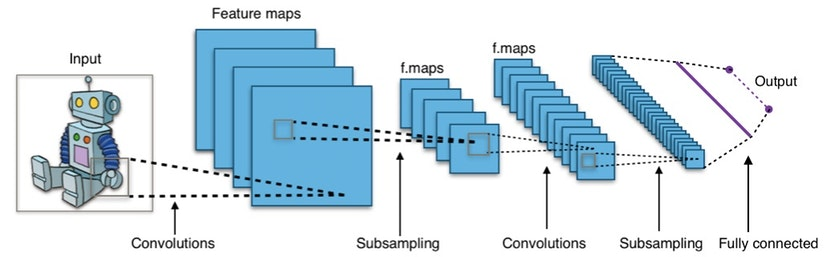

### The Process

Neural networks repeat both forward and back propagation until the weights are calibrated to accurately predict and output. A rinse and repeat process. 

#### Forward propagation


Forward propagation is a process of applying __set__ weights to the input data and calculating an output. The first forward propagation's weights are randomly set. 

#### Lets look at an example of forward propagation

Below is a table of inputs and outputs. This will be our training data. Lets use the last row (1,1) => 0 to demonstrate forward propagation.

<img src="inouthl.png">

Both 1 and 1 are our given inputs. Lets start with one hidden layer. We know our output is zero. 

<img src="first_step_hidden_layers.png">

Next we apply random weights (based on Gaussian distribution) since it is our first forward propagation. Initial weights are between zero and 1. Final weights don't need to be. 

<img src="second_hl.png">

Our next task it to __sum__ the product of the inputs with their corresponding set of weights to arrive at the first value of the hidden layer. This in essence measures the influence the input nodes have on the output.

<img src="thrid_hl.png">

To get the final value (the output) we apply the activation function to the hidden layer sums. The purpose of this is to transform the input signal into an output signal. 

There are many activation functions including: Linear, Sigmoid, Hyperbolic tangent, and a step-wise function. 

For our network lets apply a sigmoid function

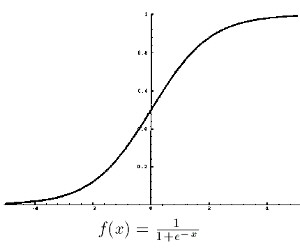

Our numbers come out to: 
S(1.0) = 0.73105857863
S(1.3) = 0.78583498304
S(0.8) = 0.68997448112

Going back to our network it looks like this:

<img src="fourth_hl.png">

#### Back propagation

In back propagation the margin of error of the output is measured. Weights are adjusted accordingly to decrease the error.



Now that we have a fairly okay-ish model. Lets use back propagation to improve it. We are looking to decrease the margin of error. 

Each layer will have its own back propagation calculation. We will begin by changing the weights between the hidden and the output layer. 

The calculation of change will happen in a few steps:

1. Find the margin of error of the output (what we get after applying the activation function) to back out the necessary change in the output sum (identified as __delta output sum__) 

2. Extract the change in weights by multiplying __delta output sum__ by the hidden layer results. 

an __output sum margin error__ is the target output result minus the calculated output result.

<img src="five_hl.png">



Target = 0 

Calculated = 0.77

Target - Calculated = -0.77

After some ___Very fun calc&trade;___ we can find our new weights based on our old weights, and a derivative of the sigmoid function:

<img src="last_hl.png">

<img src="six_hl.png">

with our new weights we have lowered our margin of error and have come one step closer to building a model to predict our output! Now that the hard stuff is out of the way lets make our computers do the heavy lifting...

# Gradients- Computers make our life so much easier...

* What is a Gradient? 
How much the output of a function changes if you change the inputs a little bit. 

This is a core backbone of the optimization process in Neural Networks. We simply measure the change in all of the weights with regard to the change in the error. The higher the Gradient, the steeper the slope. This is a partial deriviative with respect to its input - If you are a fan of calculus.

In [ ]:
!python3 -m Orange.canvas

Cool 3D animation of GD - Ride the Wave: http://www.robertsdionne.com/bouncingball/

# Full Speed Ahead! TensorFlow

## What is TensorFlow?

TensorFlow is an open source software library for numerical computation.



Suited and fine-tuned for large-scale machine learning. 

In principle its simple. Python a graph of computations to perform. Then tensorflow takes the graph and runs it using optimized C++ code. 

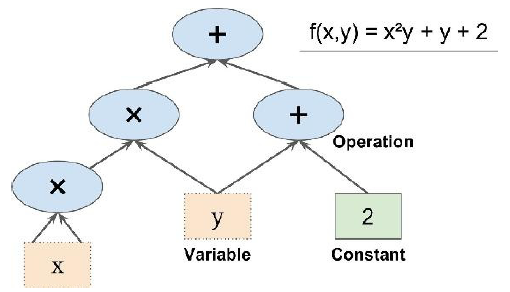

Look familiar? this is a graph of a tensor flow computation. You would create this, then define values for each node. TensorFlow is amazing due to its ability to break up the graph into several chunks and run them in parallel across multiple CPUs or GPUs. Because of this, tensor flow can train a network with millions of parameters on training sets composed of billions of instances with millions of features each. Google uses this to run its large-scale services such as Google cloud speech, photos and its search engine. 

# First Steps with TensorFlow

**Learning Objectives:**
  * Learn fundamental TensorFlow concepts
  * Use the `LinearRegressor` class in TensorFlow to predict median housing price, at the granularity of city blocks, based on one input feature
  * Evaluate the accuracy of a model's predictions using Root Mean Squared Error (RMSE)
  * Improve the accuracy of a model by tuning its hyperparameters

The [data](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) is based on 1990 census data from California.

### Setup
In this first cell, we'll load the necessary libraries.

In [ ]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

Next, we'll load our data set.

In [ ]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

We'll randomize the data, just to be sure not to get any pathological ordering effects that might harm the performance of Stochastic Gradient Descent. Additionally, we'll scale `median_house_value` to be in units of thousands, so it can be learned a little more easily with learning rates in a range that we usually use.

In [ ]:
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe

### Examine the Data

It's a good idea to get to know your data a little bit before you work with it.

We'll print out a quick summary of a few useful statistics on each column: count of examples, mean, standard deviation, max, min, and various quantiles.

In [ ]:
california_housing_dataframe.describe()

### Build the First Model

In this exercise, we'll try to predict `median_house_value`, which will be our label (sometimes also called a target). We'll use `total_rooms` as our input feature.

**NOTE:** Our data is at the city block level, so this feature represents the total number of rooms in that block.

To train our model, we'll use the [LinearRegressor](https://www.tensorflow.org/api_docs/python/tf/estimator/LinearRegressor) interface provided by the TensorFlow [Estimator](https://www.tensorflow.org/get_started/estimator) API. This API takes care of a lot of the low-level model plumbing, and exposes convenient methods for performing model training, evaluation, and inference.

In order to import our training data into TensorFlow, we need to specify what type of data each feature contains. There are two main types of data we'll use in this and future exercises:

* **Categorical Data**: Data that is textual. In this exercise, our housing data set does not contain any categorical features, but examples you might see would be the home style, the words in a real-estate ad.

* **Numerical Data**: Data that is a number (integer or float) and that you want to treat as a number. As we will discuss more later sometimes you might want to treat numerical data (e.g., a postal code) as if it were categorical.



In TensorFlow, we indicate a feature's data type using a construct called a **feature column**. Feature columns store only a description of the feature data; they do not contain the feature data itself.

To start, we're going to use just one numeric input feature, `total_rooms`. The following code pulls the `total_rooms` data from our `california_housing_dataframe` and defines the feature column using `numeric_column`, which specifies its data is numeric:

In [ ]:
# Define the input feature: total_rooms.
my_feature = california_housing_dataframe[["total_rooms"]]

# Configure a numeric feature column for total_rooms.
feature_columns = [tf.feature_column.numeric_column("total_rooms")]

In [ ]:
print(feature_columns)

**NOTE:** The shape of our `total_rooms` data is a one-dimensional array (a list of the total number of rooms for each block). This is the default shape for `numeric_column`, so we don't have to pass it as an argument.

### Step 2: Define the Target

Next, we'll define our target, which is `median_house_value`. Again, we can pull it from our `california_housing_dataframe`:

In [ ]:
# Define the label.
targets = california_housing_dataframe["median_house_value"]

Next, we'll configure a linear regression model using LinearRegressor. We'll train this model using the `GradientDescentOptimizer`, which implements Mini-Batch Stochastic Gradient Descent (SGD). The `learning_rate` argument controls the size of the gradient step.

**NOTE:** To be safe, we also apply [gradient clipping](https://developers.google.com/machine-learning/glossary/#gradient_clipping) to our optimizer via `clip_gradients_by_norm`. Gradient clipping ensures the magnitude of the gradients do not become too large during training, which can cause gradient descent to fail. 

### Step 3: Configure the LinearRegressor

In [ ]:
# Use gradient descent as the optimizer for training the model.
my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

# Configure the linear regression model with our feature columns and optimizer.
# Set a learning rate of 0.0000001 for Gradient Descent.
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=my_optimizer
)

To import our California housing data into our `LinearRegressor`, we need to define an input function, which instructs TensorFlow how to preprocess
the data, as well as how to batch, shuffle, and repeat it during model training.

First, we'll convert our *pandas* feature data into a dict of NumPy arrays. We can then use the TensorFlow [Dataset API](https://www.tensorflow.org/programmers_guide/datasets) to construct a dataset object from our data, and then break
our data into batches of `batch_size`, to be repeated for the specified number of epochs (num_epochs). 

**NOTE:** When the default value of `num_epochs=None` is passed to `repeat()`, the input data will be repeated indefinitely.

Next, if `shuffle` is set to `True`, we'll shuffle the data so that it's passed to the model randomly during training. The `buffer_size` argument specifies
the size of the dataset from which `shuffle` will randomly sample.

Finally, our input function constructs an iterator for the dataset and returns the next batch of data to the LinearRegressor.

In [ ]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

**NOTE** This is a *Basic* input funciton. For more options see a 
detailed documentation of input functions and the `Dataset` API, see the [TensorFlow Programmer's Guide](https://www.tensorflow.org/programmers_guide/datasets).

### Step 5: Train the Model

We can now call `train()` on our `linear_regressor` to train the model. We'll wrap `my_input_fn` in a `lambda`
so we can pass in `my_feature` and `targets` as arguments (see this [TensorFlow input function tutorial](https://www.tensorflow.org/get_started/input_fn#passing_input_fn_data_to_your_model) for more details), and to start, we'll
train for 100 steps.

In [ ]:
_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(my_feature, targets),
    steps=100
)

### Step 6: Evaluate the Model

Let's make predictions on that training data, to see how well our model fit it during training.

**NOTE:** Training error measures how well your model fits the training data, but it **_does not_** measure how well your model **_generalizes to new data_**. In later exercises, you'll explore how to split your data to evaluate your model's ability to generalize.


In [ ]:
# Create an input function for predictions.
# Note: Since we're making just one prediction for each example, we don't 
# need to repeat or shuffle the data here.
prediction_input_fn =lambda: my_input_fn(my_feature, targets, num_epochs=1, shuffle=False)

# Call predict() on the linear_regressor to make predictions.
predictions = linear_regressor.predict(input_fn=prediction_input_fn)

# Format predictions as a NumPy array, so we can calculate error metrics.
predictions = np.array([item['predictions'][0] for item in predictions])

# Print Mean Squared Error and Root Mean Squared Error.
mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)


In [ ]:
print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error)

Is this a good model? How would you judge how large this error is?



Mean Squared Error (MSE) can be hard to interpret, so we often look at Root Mean Squared Error (RMSE) instead. A nice property of RMSE is that it can be interpreted on the same scale as the original targets.

Let's compare the RMSE to the difference of the min and max of our targets:

In [ ]:
min_house_value = california_housing_dataframe["median_house_value"].min()
max_house_value = california_housing_dataframe["median_house_value"].max()
min_max_difference = max_house_value - min_house_value

print("Min. Median House Value: %0.3f" % min_house_value)
print("Max. Median House Value: %0.3f" % max_house_value)
print("Difference between Min. and Max.: %0.3f" % min_max_difference)
print("Root Mean Squared Error: %0.3f" % root_mean_squared_error)

Our error spans nearly half the range of the target values. Can we do better?



This is the question that nags at every model developer. Let's develop some basic strategies to reduce model error.

The first thing we can do is take a look at how well our predictions match our targets, in terms of overall summary statistics.

In [ ]:
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()

How does the mean value compare to the model's RMSE? How about the various quantiles?



We can also visualize the data and the line we've learned.  Recall that linear regression on a single feature can be drawn as a line mapping input *x* to output *y*.

First, we'll get a uniform random sample of the data so we can make a readable scatter plot.

In [ ]:
sample = california_housing_dataframe.sample(n=300)

Next, we'll plot the line we've learned, drawing from the model's bias term and feature weight, together with the scatter plot. The line will show up red.

In [ ]:
# Get the min and max total_rooms values.
x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()

# Retrieve the final weight and bias generated during training.
weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

# Get the predicted median_house_values for the min and max total_rooms values.
y_0 = weight * x_0 + bias 
y_1 = weight * x_1 + bias

# Plot our regression line from (x_0, y_0) to (x_1, y_1).
plt.plot([x_0, x_1], [y_0, y_1], c='r')

# Label the graph axes.
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")

# Plot a scatter plot from our data sample.
plt.scatter(sample["total_rooms"], sample["median_house_value"])

# Display graph.
plt.show()

This initial line looks way off.  See if you can look back at the summary stats and see the same information encoded there.

Together, these initial sanity checks suggest we may be able to find a much better line.

###  Tweak the Model Hyperparameters - Fix the things.

In the following function, we'll proceed in 10 evenly divided periods so that we can observe the model improvement at each period.

For each period, we'll compute and graph training loss.  This may help you judge when a model is converged, or if it needs more iterations.

We'll also plot the feature weight and bias term values learned by the model over time.  This is another way to see how things converge.


Gotta Leave the PPT, its toooo heafty

In [ ]:
def train_model(learning_rate, steps, batch_size, input_feature="total_rooms"):
  """Trains a linear regression model of one feature.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.
  """
  
  periods = 10
  steps_per_period = steps / periods

  my_feature = input_feature
  my_feature_data = california_housing_dataframe[[my_feature]]
  my_label = "median_house_value"
  targets = california_housing_dataframe[my_label]

  # Create feature columns.
  feature_columns = [tf.feature_column.numeric_column(my_feature)]
  
  # Create input functions.
  training_input_fn = lambda:my_input_fn(my_feature_data, targets, batch_size=batch_size)
  prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
  
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )

  # Set up to plot the state of our model's line each period.
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  sample = california_housing_dataframe.sample(n=300)
  plt.scatter(sample[my_feature], sample[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.
    predictions = linear_regressor.predict(input_fn=prediction_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Compute loss.
    root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(predictions, targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finally, track the weights and biases over time.
    # Apply some math to ensure that the data and line are plotted neatly.
    y_extents = np.array([0, sample[my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[my_feature].max()),
                           sample[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Output a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)

In [ ]:
train_model(
    learning_rate=0.00001,
    steps=100,
    batch_size=1
)

## Task 1:  Achieve an RMSE of 180 or Below


Tweak the model hyperparameters to improve loss and better match the target distribution.
If, after 5 minutes or so, you're having trouble beating a RMSE of 180, check the solution for a possible combination.

In [ ]:
train_model(
    learning_rate=0.00002,
    steps=500,
    batch_size=5
)

This is just one possible configuration; there may be other combinations of settings that also give good results. Note that in general, this exercise isn't about finding the *one best* setting, but to help build your intutions about how tweaking the model configuration affects prediction quality.

### Is There a Standard Heuristic for Model Tuning?

This is a commonly asked question. The short answer is that the effects of different hyperparameters are data dependent. So there are no hard-and-fast rules; you'll need to test on your data.

Here are a few rules of thumb that may help guide you:

 * Training error should steadily decrease, steeply at first, and should eventually plateau as training converges.
 * If the training has not converged, try running it for longer.
 * If the training error decreases too slowly, increasing the learning rate may help it decrease faster.
   * But sometimes the exact opposite may happen if the learning rate is too high.
 * If the training error varies wildly, try decreasing the learning rate.
   * Lower learning rate plus larger number of steps or larger batch size is often a good combination.
 * Very small batch sizes can also cause instability.  First try larger values like 100 or 1000, and decrease until you see degradation.

Again, never go strictly by these rules of thumb, because the effects are data dependent.  Always experiment and verify.

## Task 2: Try a Different Feature

In [ ]:
train_model(
    learning_rate=0.00002,
    steps=1000,
    batch_size=5,
    input_feature="population"
)